# Automatic Semantic Segmentation of EHG Recordings by Deep Learning: an Approach to a Screening Tool for Use in Clinical Practice

Félix Nieto del Amor 1 (feniede@ci2b.upv.es),
Yiyao Ye Lin 1,4 (yiye@ci2b.upv.es),
Rogelio Monfort Ortiz 2 (monfort_isaort@gva.es),
Vicente Jose Diago-Almela 2 (diago_vicalm@gva.es),
Jose L. Martinez-de-Juan 1 (jlmartinez@ci2b.upv.es),
Dongmei Hao 3,4 (haodongmei@bjut.edu.cn) and
Gema Prats Boluda 1,4 (gprats@ci2b.upv.es)

1. Centro de Investigación e Innovación en Bioingeniería, Universitat Politècnica de València, 46022 Valencia, Spain

2. Servicio de Obstetricia, H.U.P. La Fe, 46026 Valencia, Spain
3. Faculty of Environment and Life, Beijing University of Technology, Beijing International Science and Technology Cooperation Base for Intelligent Physiological Measurement and Clinical Transformation, Beijing 100124, China
4. BJUT-UPV Joint Research Laboratory in Biomedical Engineering


## Uploading Data for EHG Artifact Segmentation

To upload your data for EHG artifact segmentation, follow these guidelines:

### Requirements

1. **File Format:** Your data should be stored in MATLAB file format (.mat).

2. **Multiple channels:** If your records contain multiple channels (monopolar or bipolar), arrange them in the .mat file so that each channel occupies one row.

3. **Folder Structure:** The zip file should have the following structure: **zip_file/.../.../.../-filename-.mat**. Ensure that your MATLAB data file (-filename-.mat) is placed in the deepest level of the folder structure.

In [1]:
import ehgautosegnet

In [2]:
# Configuration settings for file paths and parameters
config = {}

# Directories for file storage
config['UPLOAD_FOLDER'] = './uploaded_files/' # Folder where the zip file of the folder with the data is located
config['PROCESS_FOLDER'] = './processed_files' # Folder to save segmentation

# Input and output file names

# config['INPUT_FILE_NAME'] = None # If folder with recordings unzipped
config['INPUT_FILE_NAME'] = "data.zip" # Input data zip file name
config['OUTPUT_FILE_NAME'] = "segmentation.zip" # File name to save the segmentation

# File extension for records
config['RECORDS_EXTENSION'] = ".mat" # Input file extension

## Parameter configuration

In this section, we delve into the parameter configuration specifically tailored for preprocessing and post-processing tasks.

### Preprocessing

Preprocessing plays a pivotal role in enhancing the quality and reliability of your data before it undergoes further analysis. Although some parameters can me modified, the U-Net model was trained with:
- **Sample rate (TARGET_SAMPLE_RATE)** = 10 Hz.
- **Windows lenght (WINDOWS_LENGTH)** = 128 seconds
- **Bandwidth:** from **LOWER_CUTOFF_FREQ** = 0.1 to **UPPER_CUTOFF_FREQ** = 4

In [3]:
# Sample rates for processing
config['ORIGINAL_SAMPLE_RATE'] = 20 # Hz
config['TARGET_SAMPLE_RATE'] = 10 # Hz

# Parameters for windowing and overlapping
config['WINDOWS_LENGTH'] = 128 # seconds
config['OVERLAP'] = 64 # seconds

# Frequency cutoffs for filtering
config['LOWER_CUTOFF_FREQ'] = 0.1 # Hz
config['UPPER_CUTOFF_FREQ'] = 4 # Hz

### Post-processing

1. **Threshold:** Physiological class predictions initially undergo thresholding to determine labels (physiological or non-physiological). For non-physiological labels, remaining classes (motion, respiratory, and other) are determined based on the class with the highest prediction value.
2. **Morphological operations:** Post-processing involves sequential dilation, erosion, and dilation morphological operations with a common structure of length 5 (erosion structure length: **strc_e**, dilation structure length: **strc_d**). Primary objective is to connect separated artifact portions, eliminate short segments, and reconstruct segments not disappearing with erosion. Iterations (number of erosion iterations: **n_d**, number of dilation iterations: **n_e**) for erosion and dilation vary based on artifact type (motion (**class 1**), respiratory (**class 2**), and others (**class 3**)).


In [4]:
# Threshold for segmentation
config['THRESHOLD'] = 0.40

# Postprocessing parameters
config['MORPHOLOGICAL_STRUCTS'] = {
            1: {'n_e': 15, 'n_d': 7, 'strc_e': 5, 'strc_d': 5},
            2: {'n_e': 15, 'n_d': 7, 'strc_e': 5, 'strc_d': 5},
            3: {'n_e': 15, 'n_d': 7, 'strc_e': 5, 'strc_d': 5}}
config['MIN_SEGMENT_LENGHT'] = 30 # seconds

### Configuration for displaying EHG signals and segmentation examples

In [5]:
# Settings for displaying examples
config['SHOW_EXAMPLE'] = True # False --> If there are many EHG recordings to be segmentated (high time consumption)
config['SHOW_EXAMPLE_CHANNELS'] = [1, 5, 9] # Channels to be plotted according to the .mat file
config['SHOW_EXAMPLE_W_LEN'] = 60 * 29  # seconds

## EHG recording segmentation process



Processing file: tpehg1301m.mat... 
Processing file: tpehg1746m.mat... 
Processing file: tpehg597m.mat... 
Processing file: tpehg690m.mat... 
All segmentations zipped! Click Download!


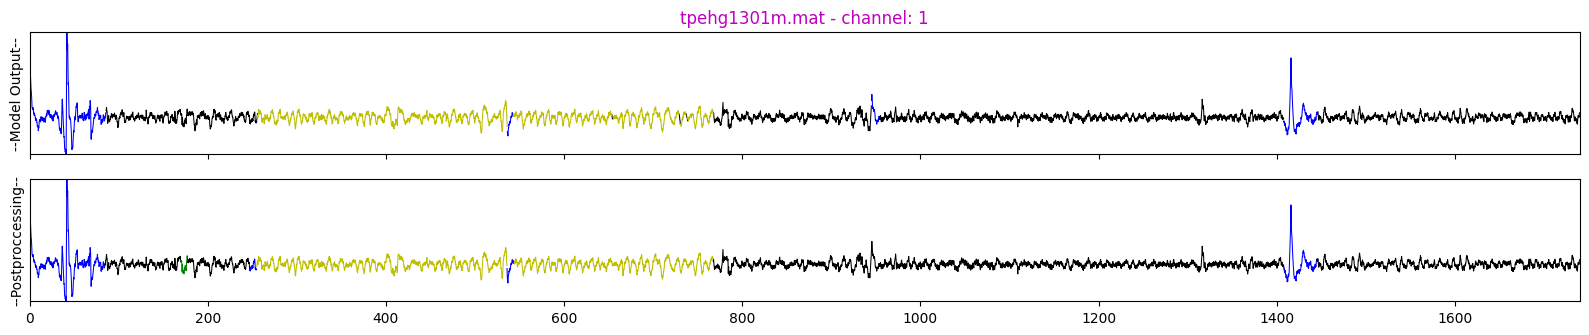

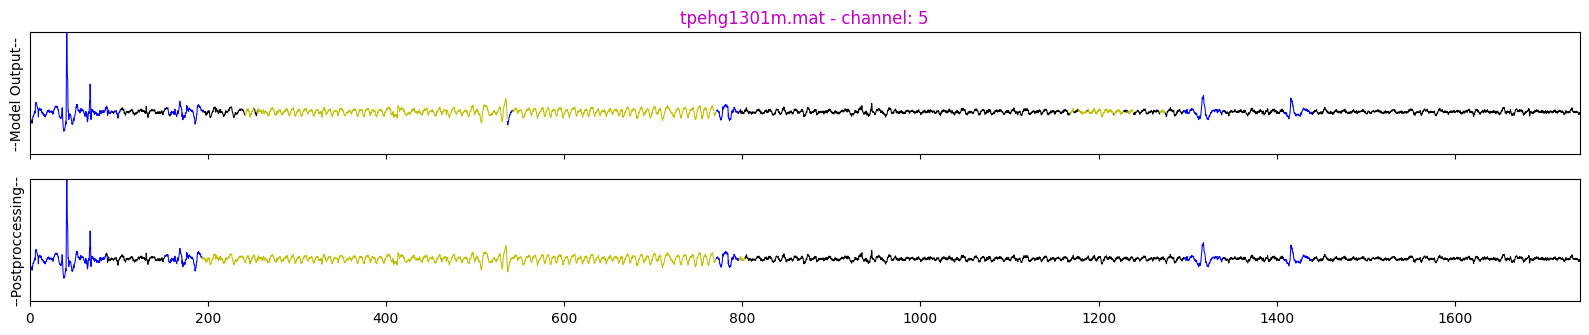

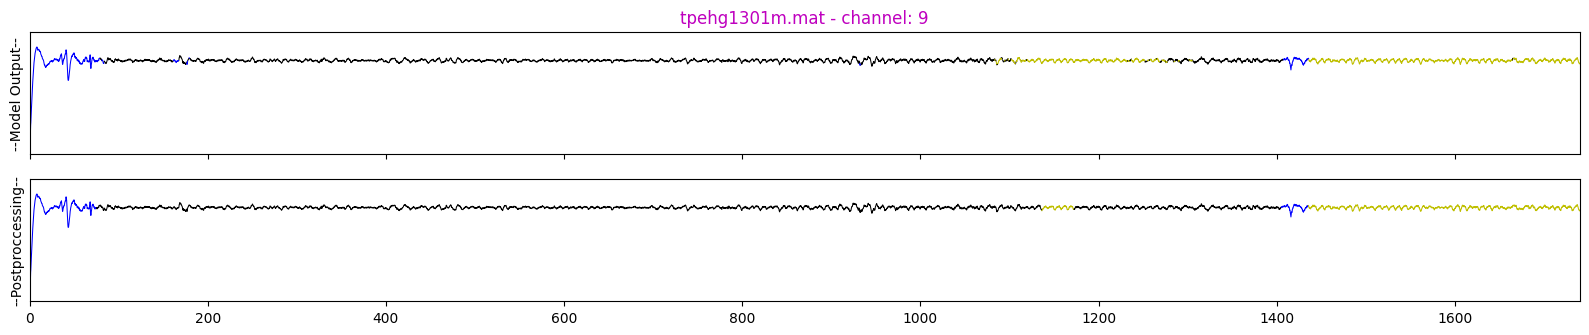

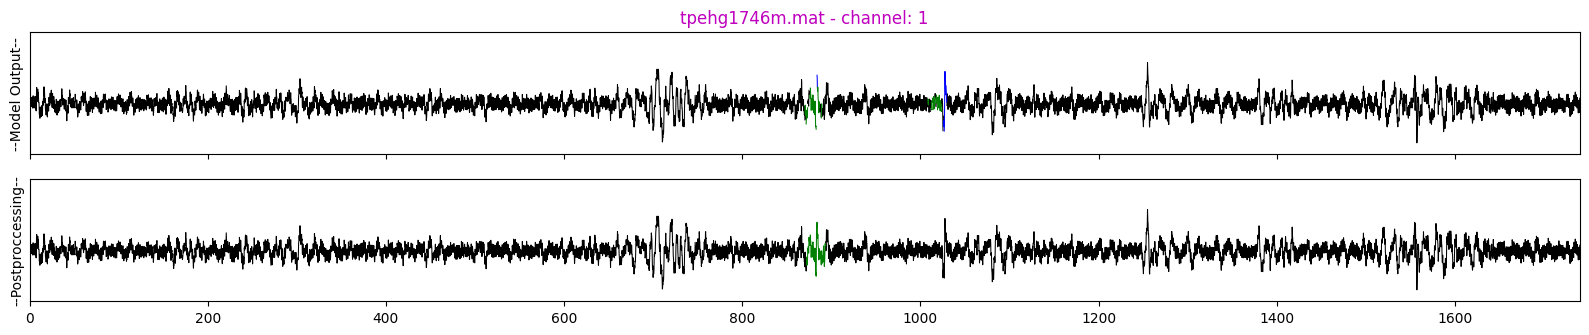

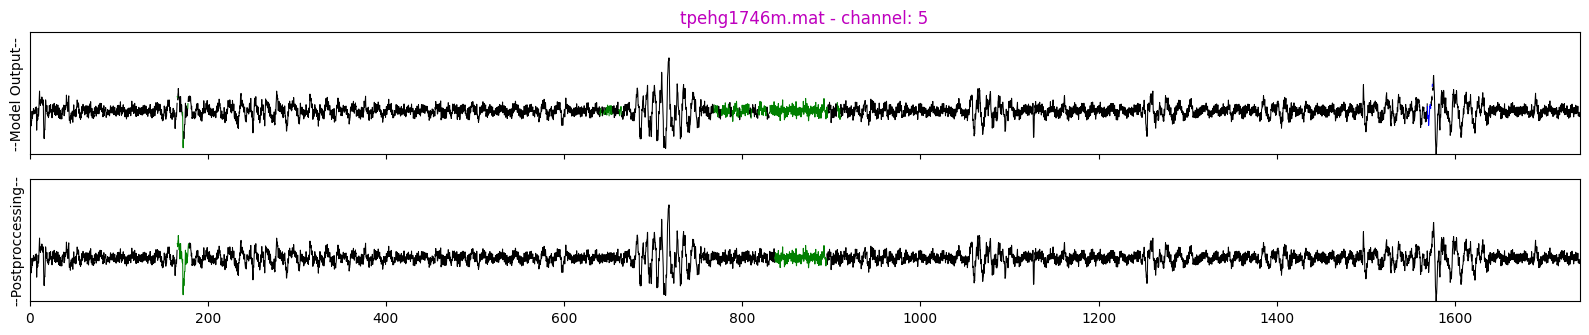

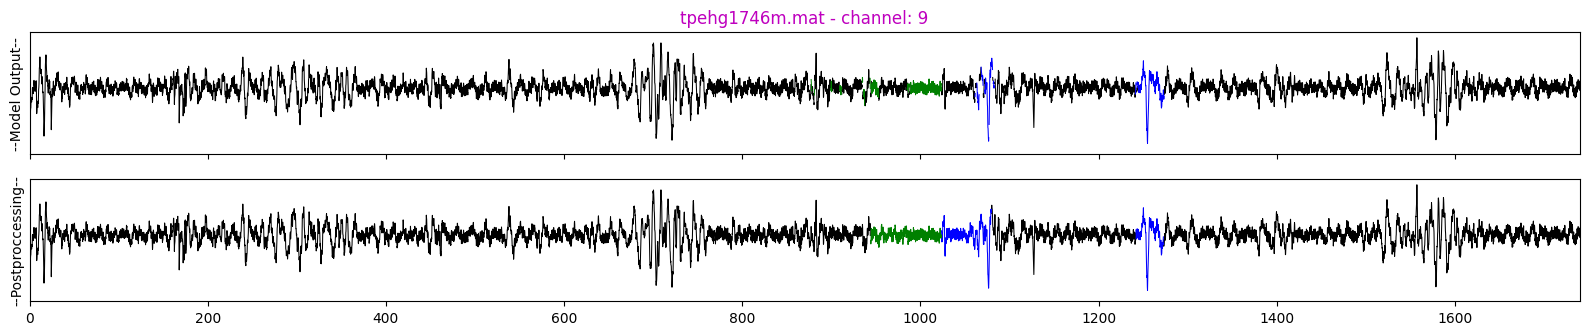

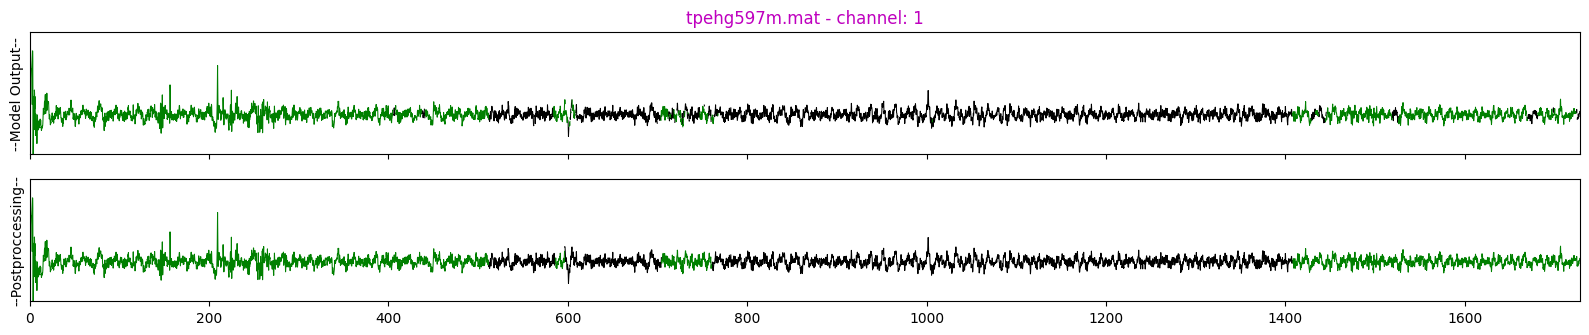

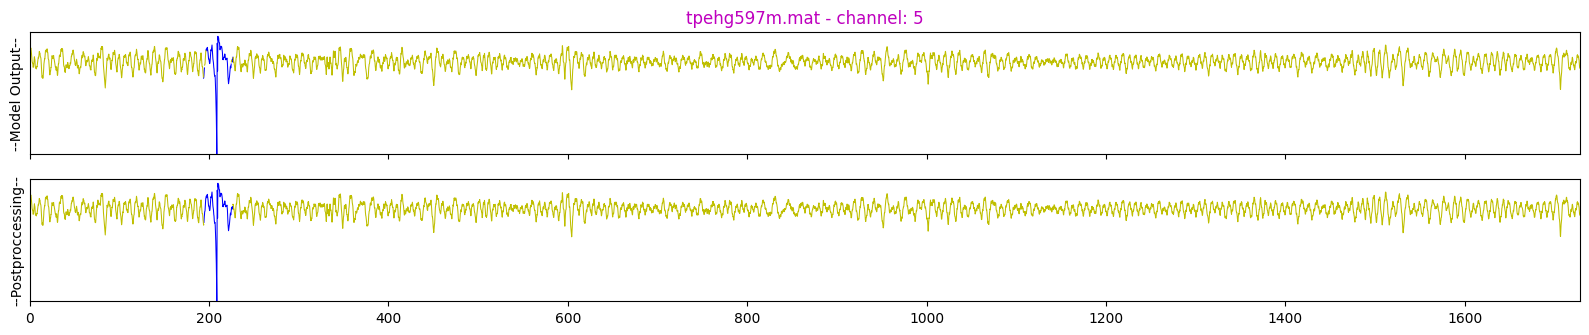

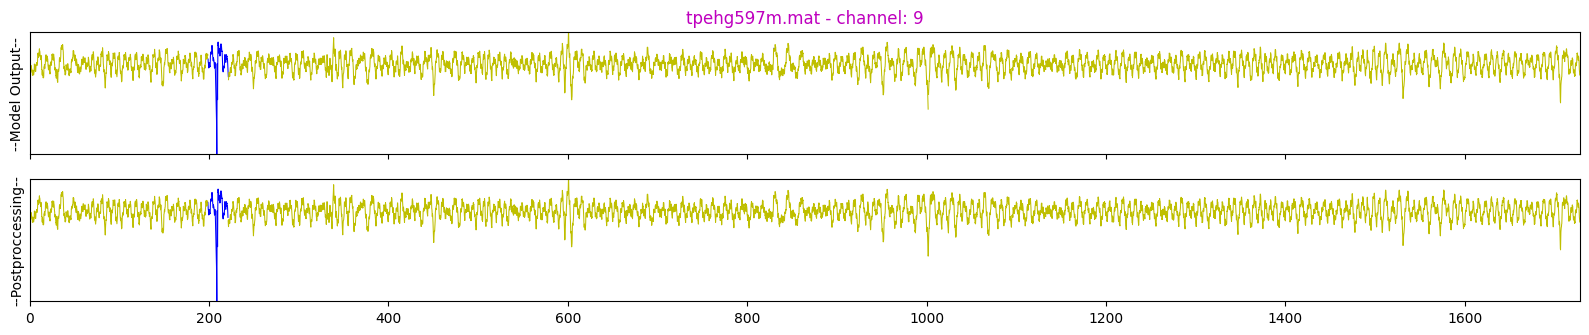

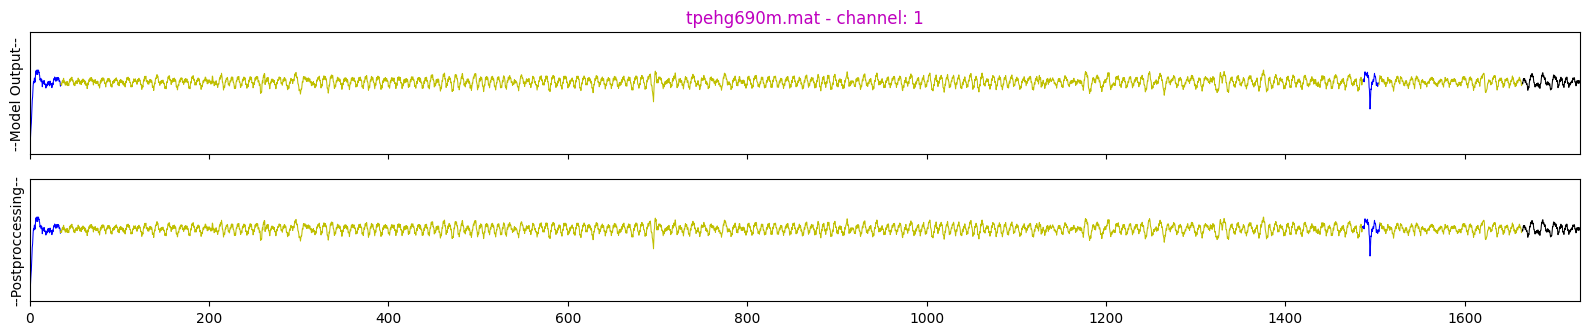

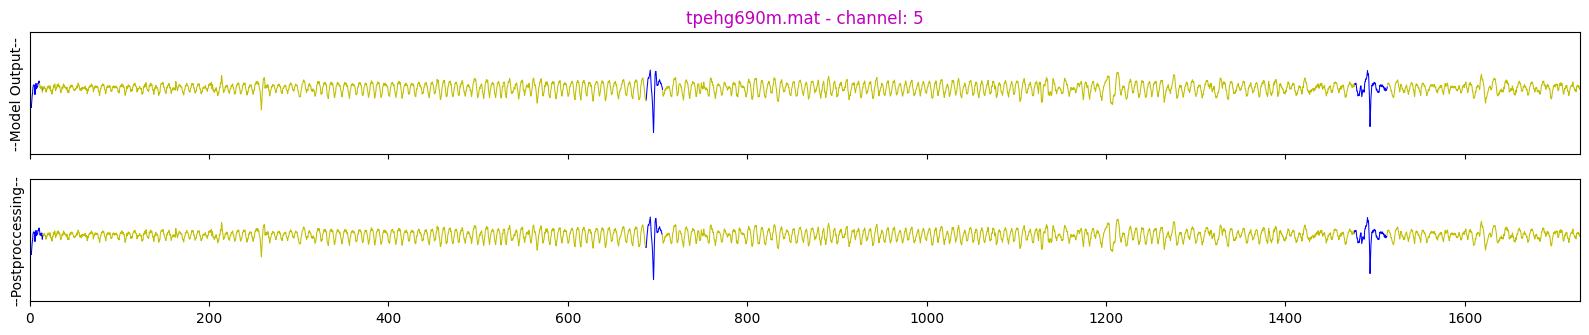

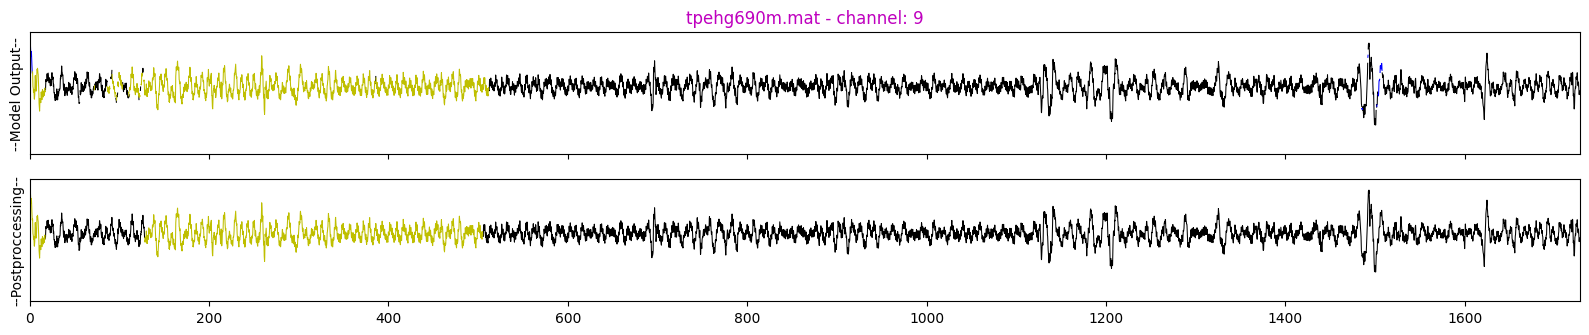

In [6]:
# Function to process files and create a zip archive
ehgautosegnet.process_files_and_zip(config)